# **_1 层隐藏层的神经网络分类二维数据_**


# 1. 导入包


① numpy 是 Python 科学计算的基本包。

② sklearn 提供了用于数据挖掘和分析的简单有效的工具。

③ matplotlib 是在 Python 中常用的绘制图形的库。

④ testCases 提供了一些测试示例用以评估函数的正确性。

⑤ planar_utils 提供了此作业中使用的各种函数。


In [30]:
import sys
import numpy
import matplotlib
import sklearn
print(sys.version)             # 打印 python 版本号
print(numpy.__version__)        # 打印 numpy 包 版本号
print(matplotlib.__version__)   # 打印 matplotlib 包 版本号
print(sklearn.__version__)         # 打印 h5py 包 版本号

3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:29:11) [MSC v.1935 64 bit (AMD64)]
1.26.4
3.9.2
1.5.1


In [31]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
# 将 andrew_dl 目录添加到 sys.path 中
# sys.path.append(os.path.join(os.getcwd(), 'andrew_dl', "l1w3"))
from andrew_dl.l1w3.testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from andrew_dl.l1w3.planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

# 设置一个固定的随机种子，以保证接下来的步骤中我们的结果是一致的。
np.random.seed(1)

# 2. 数据集


## 2.1 导入数据集


① 首先，让我们获取要使用的数据集。

② 以下代码会将花的图案的 2 类数据集加载到变量 X 和 Y 中。


In [32]:
X, Y = load_planar_dataset()

## 2.2 查看数据集图案


① 把数据集加载完成了，然后使用 matplotlib 可视化数据集。

② 数据看起来像一朵由红色（y = 0）和蓝色（y = 1）的数据点组成的花朵图案。

③ 我们的目标是建立一个适合该数据的分类模型。


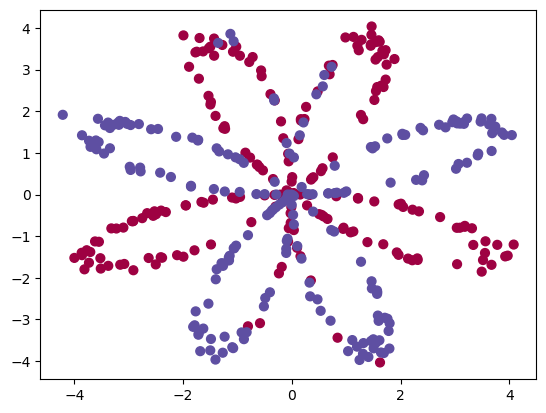

In [33]:
# 绘制散点图
plt.scatter(X[0, :], X[1, :], c=Y.reshape(
    X[0, :].shape), s=40, cmap=plt.cm.Spectral)

## 2.3 查看数据集维度


① 现在，我们已经有了以下的东西：

1. X：一个 numpy 的矩阵，包含了这些数据点的数值
2. Y：一个 numpy 的向量，对应着的是 X 的标签【0 | 1】（红色:0 ， 蓝色 :1）

② 我们继续来仔细地看数据。


In [34]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [35]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]  # 训练集里面的数量

print('X的维度为: ' + str(shape_X))
print('Y的维度为: ' + str(shape_Y))
print("数据集里面的数据有：" + str(m) + " 个")

X的维度为: (2, 400)
Y的维度为: (1, 400)
数据集里面的数据有：400 个


# 3. Logistic 回归


## 3.1 Logistic 回归简介


① 在构建完整的神经网络之前，先让我们看看逻辑回归在这个问题上的表现如何。

② 我们可以使用 sklearn 的内置函数来做到这一点， 运行下面的代码来训练数据集上的逻辑回归分类器。


## 3.2 Logistic 回归模型


In [36]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

d:\software\miniforge\envs\v3.11.6\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

## 3.3 绘制边界


① 现在，你可以运行下面的代码以绘制此模型的决策边界：


逻辑回归的准确性：47 % (正确标记的数据点所占的百分比)


C:\Users\admin\AppData\Local\Temp\ipykernel_9008\1411820471.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(np.dot(Y, LR_predictions) + np.dot(1 - Y,


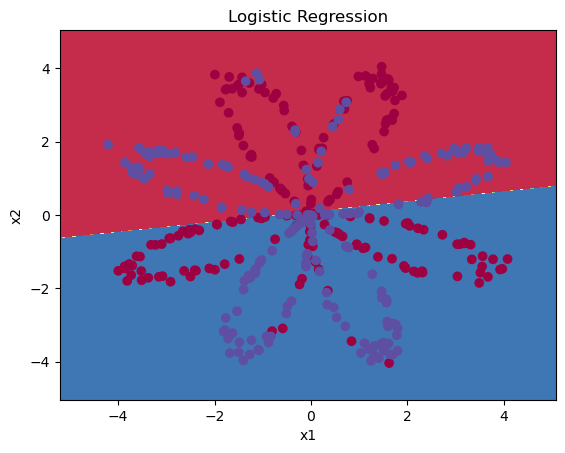

In [37]:
# Plot the decision boundary for logistic regression
# 绘制决策边界
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
# 图标题
plt.title("Logistic Regression")
# 打印准确性
LR_predictions = clf.predict(X.T)
# np.dot(Y, LR_predictions) 是计算 Y 和 LR_predictions 向量的点积（dot product）。实际上，这个操作相当于计算所有预测正确的数据点的数量，即模型预测的标签与真实标签一致的次数。
# 当 Y[i] == 1 且 LR_predictions[i] == 1 时，预测是正确的。
# 只有当这两个值都为1时，np.dot(Y, LR_predictions) 会增加。
# np.dot(1 - Y, 1 - LR_predictions) 是计算预测为0并且真实标签也是0的数据点数量，即模型预测正确且标签为0的次数。
# 当 Y[i] == 0 且 LR_predictions[i] == 0 时，预测也是正确的。
# 只有当这两个值都为0时，np.dot(1 - Y, 1 - LR_predictions) 会增加。
accuracy = float(np.dot(Y, LR_predictions) + np.dot(1 - Y,
                 1 - LR_predictions)) / float(Y.size) * 100
print('逻辑回归的准确性：%d %% (正确标记的数据点所占的百分比)' % accuracy)

② 由于数据集不是线性可分类的，因此逻辑回归效果不佳。让我们试试是否神经网络会做得更好吧！


# 4. 神经网络模型


## 4.1 神经网络简介


① 从上面我们可以得知 Logistic 回归不适用于“flower 数据集”。

② 现在你将训练带有单个隐藏层的神经网络。

③ 这是我们的模型：

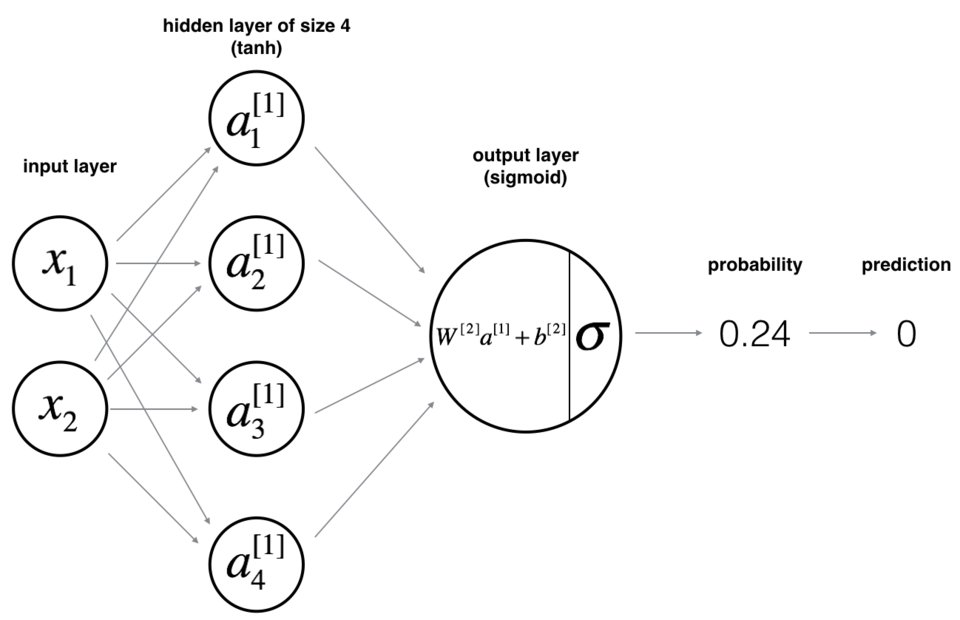


## 4.2 神经网络数学模型


① 数学原理：
例如对第$i$个样本$x^{(i)}$，执行以下操作：
$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$
$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$
$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$
$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$
$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$
② 根据所有的预测数据，你还可以如下计算损失 J:
$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$


## 4.3 建立神经网络方法


① 建立神经网络的一般方法是：

1. 定义神经网络结构（输入单元数，隐藏单元数等）。
2. 初始化模型的参数
3. 循环：

- 3.1 实施前项传播
- 3.2 计算损失
- 3.3 实现后向传播
- 3.4 更新参数（梯度下降）

② 我们通常会构建辅助函数来计算第（1）-（3）步，然后将它们合并为 nn_model()函数。

③ 一旦构建了 nn_model() 并学习了正确的参数，就可以对新数据进行预测。


## 4.4 定义神经网络结构


① 在构建神经网络之前，我们要先把神经网络的结构给定义好。

② 定义三个变量：

1. n_x：输入层的大小
2. n_h：隐藏层的大小（将其设置为 4）
3. n_y：输出层的大小

note：使用 shape 来找到 n_x 和 n_y。 另外，将隐藏层大小硬编码为 4。


In [38]:
def layer_sizes(X, Y):
    """
    参数：
     X - 输入数据集,维度为（输入的数量，训练/测试的数量）
     Y - 标签，维度为（输出的数量，训练/测试数量）

    返回：
     n_x - 输入层的数量
     n_h - 隐藏层的数量
     n_y - 输出层的数量
    """

    # 输入层大小
    n_x = X.shape[0]
    # 隐藏层大小
    n_h = 4
    # 输出层大小
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [39]:
# 测试一下 layer_sizes 函数
print("=========================测试layer_sizes=========================")
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

=========================测试layer_sizes=========================
The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


## 4.5 初始化模型的参数


① 在这里，我们要实现函数 initialize_parameters()。

② 我们要确保我们的参数大小合适。

③ 我们将会用随机值初始化权重矩阵。

- np.random.randn(a，b) \* 0.01 来随机初始化一个维度为(a，b)的矩阵。
- np.zeros((a，b))用零初始化矩阵（a，b）。将偏向量初始化为零。


In [40]:
def initialize_parameters(n_x, n_h, n_y):
    """
    参数：
        n_x - 输入层节点的数量
        n_h - 隐藏层节点的数量
        n_y - 输出层节点的数量

    返回：
        parameters - 包含参数的字典：
            W1 - 权重矩阵,维度为（n_h，n_x）
            b1 - 偏向量，维度为（n_h，1）
            W2 - 权重矩阵，维度为（n_y，n_h）
            b2 - 偏向量，维度为（n_y，1）

    """

    # 设置一个种子，这样你的输出与我们的匹配，尽管初始化是随机的。
    np.random.seed(2)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    # 使用断言确保我的数据格式是正确的
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [41]:
# 测试一下 initialize_parameters 函数
print("=========================测试initialize_parameters=========================")
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试initialize_parameters=========================
W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


## 4.6 循环


### 4.6.1 前向传播


① 我们现在要实现前向传播函数 forward_propagation()。

② 我们可以使用 sigmoid()函数，也可以使用 np.tanh()函数。

③ 步骤如下：

- 使用字典类型的 parameters（它是 initialize_parameters() 的输出）检索每个参数。
- 实现前向传播，计算$Z^{[1]}, A^{[1]}, Z^{[2]}$和$A^{[2]}$（所有训练数据的预测结果向量）。
- 反向传播所需的值存储在 cache 中，cache 将作为反向传播函数的输入。


In [42]:
def forward_propagation(X, parameters):
    """
    参数：
         X - 维度为（n_x，m）的输入数据。
         parameters - 初始化函数（initialize_parameters）的输出

    返回：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型变量
     """

    # 从字典 “parameters” 中检索每个参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # 实现前向传播计算A2(概率)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # 使用断言确保我的数据格式是正确的
    assert (A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [43]:
# 测试一下 forward_propagation 函数
print("=========================测试forward_propagation=========================")
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
# 我们在这里使用均值只是为了确保你的输出与我们的输出匹配。
print(np.mean(cache['Z1']), np.mean(cache['A1']),
      np.mean(cache['Z2']), np.mean(cache['A2']))

=========================测试forward_propagation=========================
-0.0004997557777419913 -0.000496963353231779 0.00043818745095914653 0.500109546852431


### 4.6.2 计算成本


① 现在，我们已经计算了$A^{[2]}$

② $a^{[2](i)}$包含了训练集里每个数值，现在我们可以构建成本函数了。

③ 我们的成本选择交叉熵损失，计算成本的公式如下：
$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{7}$


In [44]:
def compute_cost(A2, Y, parameters):
    """
    计算方程（7）中给出的交叉熵成本，
    参数：
         A2 - 使用sigmoid()函数计算的第二次激活后的数值
         Y - "True"标签向量,维度为（1，数量）
         parameters - 一个包含W1，B1，W2和B2的字典类型的变量
    返回：
         成本 - 交叉熵成本给出方程（7）
    """
    # 样本数量
    m = Y.shape[1]
    # 计算交叉熵代价
    logprobs = Y*np.log(A2) + (1-Y) * np.log(1-A2)
    cost = -1/m * np.sum(logprobs)
    # 确保损失是我们期望的维度
    # 例如，turns [[17]] into 17
    cost = np.squeeze(cost)
    assert (isinstance(cost, float))
    return cost

In [45]:
# 测试一下 compute_cost 函数
print("=========================测试compute_cost=========================")
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

=========================测试compute_cost=========================
cost = 0.6929198937761265


① 使用正向传播期间计算的 cache，现在可以利用它实现反向传播。

② 现在我们要开始实现函数 backward_propagation（）。


### 4.6.3 后向传播


① 反向传播通常是深度学习中最难（数学意义）部分，为了帮助你，这里有反向传播讲座的幻灯片。

② 由于我们正在构建向量化实现，因此我们将需要使用这下面的六个方程：

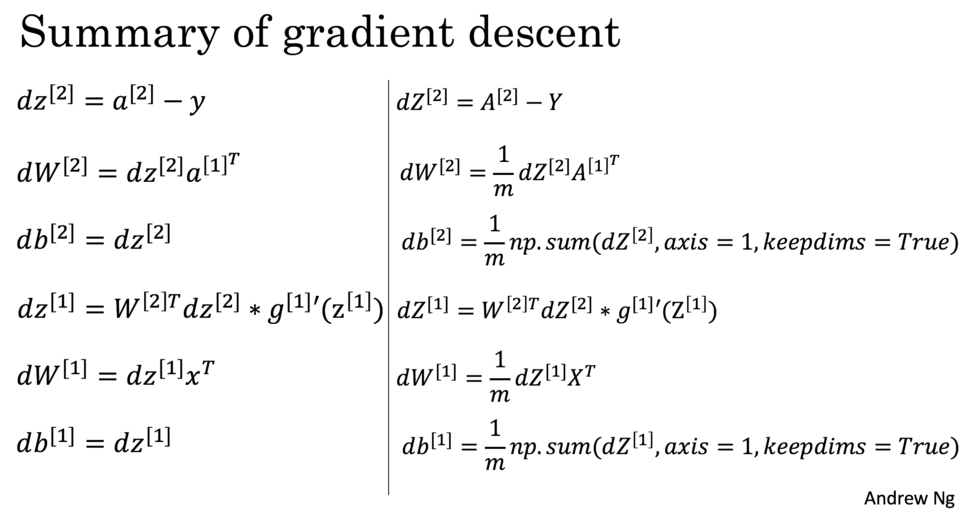


③ 要计算$dz^{[1]}$，你首先需要计算$g^{[1]'}(Z^{[1]})$。

④ $g^{[1]}(...)$ 是 tanh 激活函数，因此如果$a = g^{[1]}(z)$则$g^{[1]'}(z) = 1-a^2$。

⑤ 所以我们需要使用(1 - np.power(A1, 2))计算$g^{[1]'}(Z^{[1]})$。


In [46]:
def backward_propagation(parameters, cache, X, Y):
    """
    使用上述说明搭建反向传播函数。

    参数：
     parameters - 包含我们的参数的一个字典类型的变量。
     cache - 包含“Z1”，“A1”，“Z2”和“A2”的字典类型的变量。
     X - 输入数据，维度为（2，数量）
     Y - “True”标签，维度为（1，数量）

    返回：
     grads - 包含W和b的导数一个字典类型的变量。
    """

    m = X.shape[1]

    # 首先，从字典“parameters”中检索W1和W2。
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    # 还可以从字典“cache”中检索A1和A2。
    A1 = cache["A1"]
    A2 = cache["A2"]

    # 反向传播:计算 dW1、db1、dW2、db2。
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [47]:
# 测试一下 backward_propagation 函数
print("=========================测试backward_propagation=========================")
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

=========================测试backward_propagation=========================
dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


⑥ 反向传播完成了，我们开始对参数进行更新。


### 4.6.4 更新参数


① 我们需要使用（dW1，db1，dW2，db2）更新（W1，b1，W2，b2）。

② 更新算法如下：
$ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$

③ 其中：

1. $\alpha$ 代表学习率
2. $\theta$ 代表一个参数。

④ 我们需要选择一个良好的学习速率，我们可以看一下下面这两个图(图由 Adam Harley 提供)。


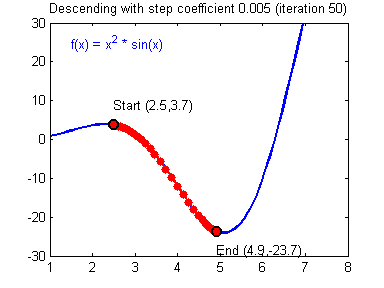


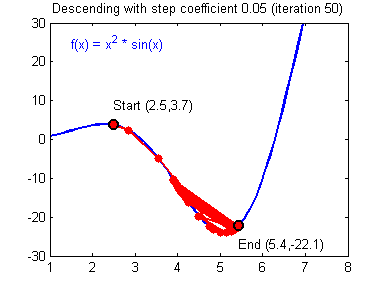


⑤ 上面两个图分别代表了具有良好学习速率（收敛）和不良学习速率（发散）的梯度下降算法。


In [48]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    使用上面给出的梯度下降更新规则更新参数

    参数：
     parameters - 包含参数的字典类型的变量。
     grads - 包含导数值的字典类型的变量。
     learning_rate - 学习速率

    返回：
     parameters - 包含更新参数的字典类型的变量。
    """

    # 从字典“parameters”中检索每个参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # 从字典“梯度”中检索每个梯度
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # 每个参数的更新规则
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [49]:
# 测试一下 update_parameters 函数
print("=========================测试update_parameters=========================")
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试update_parameters=========================
W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


## 4.7 整合


① 我们现在把上面的东西整合到 nn_model()中，神经网络模型必须以正确的顺序使用先前的功能。


In [ ]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    参数：
        X - 数据集,维度为（2，示例数）
        Y - 标签，维度为（1，示例数）
        n_h - 隐藏层的数量
        num_iterations - 梯度下降循环中的迭代次数
        print_cost - 如果为True，则每1000次迭代打印一次成本数值
    返回：
        parameters - 模型学习的参数，它们可以用来进行预测。
     """
    # 初始化参数，然后检索 W1, b1, W2, b2。输入:“n_x, n_h, n_y”。
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    # 初始化参数，然后检索 W1, b1, W2, b2。
    # 输入:“n_x, n_h, n_y”。输出=“W1, b1, W2, b2，参数”。
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # 循环(梯度下降)
    for i in range(0, num_iterations):
        # 前项传播
        A2, cache = forward_propagation(X, parameters)
        # 计算成本
        cost = compute_cost(A2, Y, parameters)
        # 反向传播
        grads = backward_propagation(parameters, cache, X, Y)
        # 更新参数
        parameters = update_parameters(parameters, grads)
        # 每1000次迭代打印成本
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    return parameters

In [51]:
# 测试一下 nn_model 函数
print("=========================测试nn_model=========================")
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4,
                      num_iterations=10000, print_cost=False)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

=========================测试nn_model=========================


C:\Users\admin\AppData\Local\Temp\ipykernel_9008\358797758.py:14: RuntimeWarning: divide by zero encountered in log
  logprobs = Y*np.log(A2) + (1-Y) * np.log(1-A2)
C:\Users\admin\AppData\Local\Temp\ipykernel_9008\2464296198.py:2: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))


W1 = [[-4.18491937  5.33220204]
 [-7.52992417  1.24304199]
 [-4.19261757  5.32651562]
 [ 7.52989417 -1.24305818]]
b1 = [[ 2.32930656]
 [ 3.79452814]
 [ 2.3300857 ]
 [-3.79457559]]
W2 = [[-6033.83652739 -6008.12960751 -6033.10074826  6008.0659983 ]]
b2 = [[-52.66625618]]


## 4.8 预测


① 构建 predict()来使用模型进行预测。

② 使用正向传播来预测结果。

note：$y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}  
      1 & \text{if}\ activation > 0.5 \\  
      0 & \text{otherwise}  
    \end{cases}$

note：如果你想基于阈值将矩阵 X 设为 0 和 1，则可以执行以下操作： X_new = (X > threshold)


In [52]:
def predict(parameters, X):
    """
    使用学习的参数，为X中的每个示例预测一个类
    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）
    返回
        predictions - 我们模型预测的向量（红色：0 /蓝色：1）
     """
    # 使用前向传播计算概率，并使用 0.5 作为阈值将其分类为 0/1。
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions

③ 现在运行模型以查看其如何在二维数据集上运行。

④ 运行以下代码以使用含有$n_h$隐藏单元的单个隐藏层测试模型。


In [53]:
# 测试一下 predict 函数
print("=========================测试predict=========================")
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("预测的平均值= " + str(np.mean(predictions)))

=========================测试predict=========================
预测的平均值= 0.6666666666666666


⑤ 现在我们把所有的东西基本都做完了，我们开始正式运行。


# 5. 正式运行


## 5.1 构建训练模型


In [54]:
# 用 n_h 维隐藏层构建一个模型
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219473
Cost after iteration 9000: 0.218612


## 5.2 绘制决策边界


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

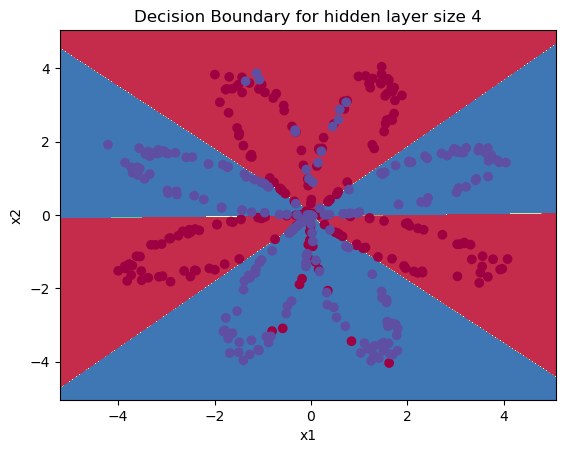

In [55]:
# 绘制决策边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

## 5.3 打印准确率


In [56]:
# 打印准确率
predictions = predict(parameters, X)
print('准确率: %d' % float((np.dot(Y, predictions.T) +
      np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

准确率: 90%


C:\Users\admin\AppData\Local\Temp\ipykernel_9008\3179171318.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('准确率: %d' % float((np.dot(Y, predictions.T) +


① 与 Logistic 回归相比，准确性确实更高。

② 该模型学习了 flower 的叶子图案！与逻辑回归不同，神经网络甚至能够学习非线性的决策边界。


## 5.4 调节隐藏层节点数量


① 现在，让我们尝试几种不同的隐藏层大小。

② 调整隐藏层大小（可选练习）运行以下代码（可能需要 1-2 分钟），你将观察到不同大小隐藏层的模型的不同表现。


C:\Users\admin\AppData\Local\Temp\ipykernel_9008\3783115660.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) +


隐藏层的节点数量： 1  ，准确率: 67.5 %
隐藏层的节点数量： 2  ，准确率: 67.25 %
隐藏层的节点数量： 3  ，准确率: 90.75 %
隐藏层的节点数量： 4  ，准确率: 90.5 %
隐藏层的节点数量： 5  ，准确率: 91.25 %
隐藏层的节点数量： 10  ，准确率: 90.25 %
隐藏层的节点数量： 20  ，准确率: 90.0 %


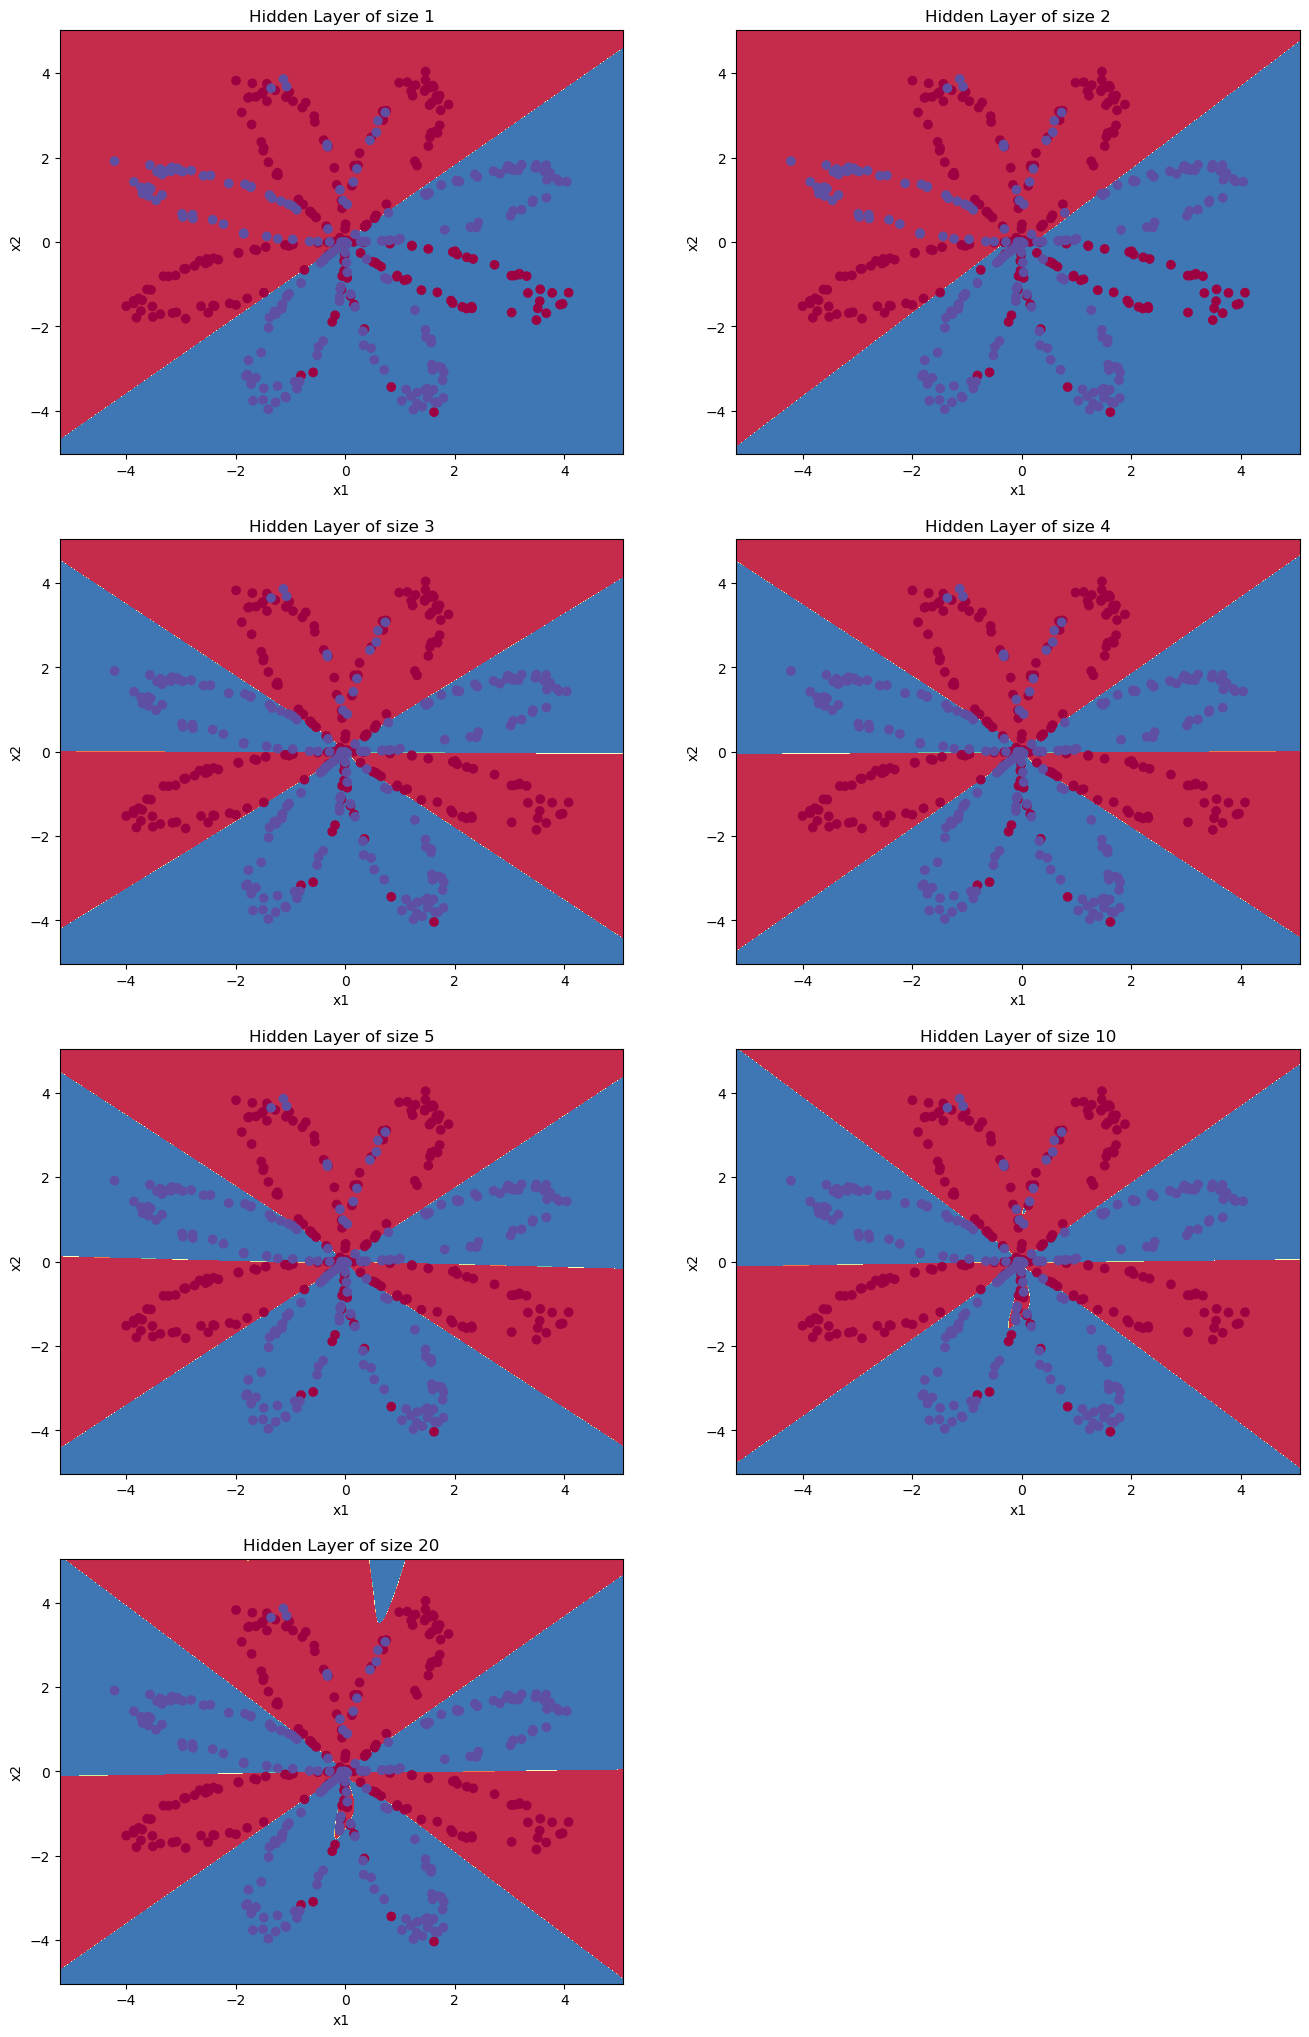

In [57]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]  # 隐藏层数量
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) +
                     np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)
    print("隐藏层的节点数量： {}  ，准确率: {} %".format(n_h, accuracy))

③ 较大的模型（具有更多隐藏单元）能够更好地适应训练集，直到最终的最大模型过度拟合数据。

④ 最好的隐藏层大小似乎在 n_h = 5 附近。实际上，这里的值似乎很适合数据，而且不会引起过度拟合。

⑤ 我们还将在后面学习有关正则化的知识，它允许我们使用非常大的模型（如 n_h = 50），而不会出现太多过度拟合。
